In [1]:
import gensim
# load the saved model
model = gensim.models.keyedvectors.KeyedVectors.load_word2vec_format('./downloads/GoogleNews-vectors-negative300.bin', binary=True)
#Checking how similarity works.
print (model.similarity('this', 'is'))

0.40797037


In [2]:
#Lets check one more.
print (model.similarity('post', 'book'))

0.057204388


In [3]:
# Finding the odd one out.
model.doesnt_match('breakfast cereal dinner lunch'.split())

'cereal'

In [4]:
# It is also finding the relations between words.
model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

In [5]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [6]:
from gensim.models import FastText
from sklearn.decomposition import PCA
from matplotlib import pyplot
#Example sentences
sentences = [['I', 'love', 'nlp'],
 ['I', 'will', 'learn', 'nlp', 'in', '2','months'],
 ['nlp', 'is', 'future'],
 ['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 
'industry', 'problems'],
 ['nlp', 'uses', 'machine', 'learning']]
fast = FastText(sentences,vector_size=20, window=1, min_count=1, workers=5, min_n=1, max_n=2)

In [7]:
print(fast.wv['nlp'])

[-0.0104417  -0.00166992  0.00851491 -0.00545158 -0.01564237  0.01678064
  0.00298394  0.00162992 -0.01518791  0.00655622  0.01039656 -0.00142836
 -0.01665709  0.00949577  0.00262533 -0.00541661  0.0063507  -0.00105192
 -0.02014118  0.00102295]


In [8]:
print(fast.wv['deep'])

[-0.00718654 -0.00310375 -0.00214245 -0.00143115 -0.00600197  0.00922425
  0.01241926 -0.00713524 -0.0069327  -0.00987075  0.01335533 -0.0081027
  0.01761531 -0.00716007 -0.00427308  0.00729467  0.01494504 -0.0162607
  0.01229173  0.01455308]


In [9]:
import numpy as np

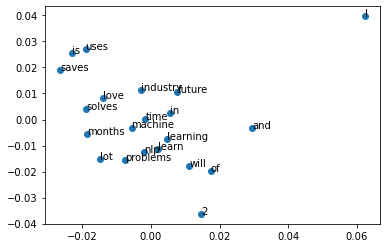

In [10]:
# visualize
X = np.asarray(fast.wv.vectors)
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(fast.wv.key_to_index.keys())
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

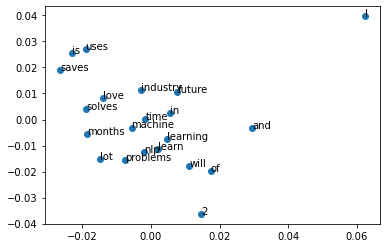

In [11]:
# visualize
X = np.asarray(fast.wv.vectors)
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(fast.wv.key_to_index.keys())
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [12]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt') # one time execution
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rvsha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
# Read the CSV file
df = pd.read_csv('downloads/tennisarticlesv4.csv')

In [14]:
df.head()

,article_id,article_text,source
0,1,Maria Sharapova has basically no friends as te...,https://www.tennisworldusa.org/tennis/news/Mar...
1,2,"BASEL, Switzerland (AP), Roger Federer advance...",http://www.tennis.com/pro-game/2018/10/copil-s...
2,3,Roger Federer has revealed that organisers of ...,https://scroll.in/field/899938/tennis-roger-fe...
3,4,Kei Nishikori will try to end his long losing ...,http://www.tennis.com/pro-game/2018/10/nishiko...
4,5,"Federer, 37, first broke through on tour over ...",https://www.express.co.uk/sport/tennis/1036101...


In [15]:
# split the the text in the articles into sentences
sentences = []
for s in df['article_text']:
    sentences.append(sent_tokenize(s))

In [16]:
sentences[0]

['Maria Sharapova has basically no friends as tennis players on the WTA Tour.',
 "The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much.",
 'I think everyone knows this is my job here.',
 "When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.",
 "I'm a pretty competitive girl.",
 "I say my hellos, but I'm not sending any players flowers as well.",
 "Uhm, I'm not really friendly or close to many players.",
 "I have not a lot of friends away from the courts.'",
 'When she said she is not really close to a lot of players, is that something strategic that she is doing?',
 "Is it different on the men's tour than the women's tour?",
 "'No, not at all.

In [17]:
# flatten the list
sentences = [y for x in sentences for y in x]

In [18]:
sentences

['Maria Sharapova has basically no friends as tennis players on the WTA Tour.',
 "The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much.",
 'I think everyone knows this is my job here.',
 "When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.",
 "I'm a pretty competitive girl.",
 "I say my hellos, but I'm not sending any players flowers as well.",
 "Uhm, I'm not really friendly or close to many players.",
 "I have not a lot of friends away from the courts.'",
 'When she said she is not really close to a lot of players, is that something strategic that she is doing?',
 "Is it different on the men's tour than the women's tour?",
 "'No, not at all.

In [19]:
sentences[0]

'Maria Sharapova has basically no friends as tennis players on the WTA Tour.'

In [20]:
# remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

# make alphabets lowercase
clean_sentences = [s.lower() for s in clean_sentences]

C:\Users\rvsha\AppData\Local\Temp/ipykernel_25492/2467188159.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")


In [21]:
nltk.download('stopwords')# one time execution

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rvsha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [23]:
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [24]:
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [25]:
# Extract word vectors
word_embeddings = {}
f = open('downloads/glove/glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [26]:
sentence_vectors = []
for i in clean_sentences:
    if len(i) != 0:
        v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
    else:
        v = np.zeros((100,))
    sentence_vectors.append(v)

In [27]:
len(sentence_vectors)

119

In [28]:
# similarity matrix
sim_mat = np.zeros([len(sentences), len(sentences)]) # matrics of 119x119

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
# Initialize matrics with cosine similarity score
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

In [31]:
# Applying page rank algorithm 
import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

In [32]:
# getting top words for summarization
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

In [33]:
# Specify number of sentences to form the summary
sn = 10
# Generate summary
for i in range(sn):
    print(ranked_sentences[i][1])

When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.
Major players feel that a big event in late November combined with one in January before the Australian Open will mean too much tennis and too little rest.
Speaking at the Swiss Indoors tournament where he will play in Sundays final against Romanian qualifier Marius Copil, the world number three said that given the impossibly short time frame to make a decision, he opted out of any commitment.
"I felt like the best weeks that I had to get to know players when I was playing were the Fed Cup weeks or the Olympic weeks, not necessarily during the tournaments.
Currently in ninth place, Nishikori with a win could move to within 125 points of the cut for the eight-man event in London 

In [34]:
!pip install pytextrank
!python -m spacy download en_core_web_sm

  Attempting uninstall: smart-open
    Found existing installation: smart-open 6.2.0
    Uninstalling smart-open-6.2.0:
      Successfully uninstalled smart-open-6.2.0
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [36]:
import spacy
import pytextrank

In [37]:
document = """Not only did it only confirm that the film would be unfunny and generic, but it also managed to give away the ENTIRE movie; and I'm not exaggerating - every moment, every 
plot point, every joke is told in the trailer."""

In [38]:
en_nlp = spacy.load("en_core_web_sm")
en_nlp.add_pipe("textrank")
doc = en_nlp(document)

In [39]:
tr = doc._.textrank
print(tr.elapsed_time)

6.943702697753906


In [40]:
for combination in doc._.phrases:
    print(combination.text, combination.rank, combination.count)

ENTIRE 0.12192569955977017 1
the trailer 0.09398909652862131 1
the ENTIRE movie 0.08809272122598891 1
every joke 0.06774199896077908 1
the film 0.03642647504614921 1
I 0.0 1
it 0.0 2
